### Healthcare - the cost of quality

#### Q. What is the cost of a medical provider compared to its state?
#### Q. What is the rationale of statewide comparison?

Does state comparison for all treatment make sense? What is a better comparison at the state level?


In [2]:
#install.packages("zipcode")
library(dplyr)
#library(DataExplorer)
#library(xda)
library(ggplot2)
library(plotly)
library(data.table)
library(zipcode)
suppressPackageStartupMessages(library(tidyverse))
library(stringr)
#library(ggthemes)
suppressPackageStartupMessages(library(maps))

In [67]:
payment <- read.csv("/Users/chriskuo/Downloads/inpatientCharges.csv")

In [5]:
summary(payment)

                                                                  DRG.Definition  
 194 - SIMPLE PNEUMONIA & PLEURISY W CC                                  :  3023  
 690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                         :  2989  
 292 - HEART FAILURE & SHOCK W CC                                        :  2953  
 392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC            :  2950  
 641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC:  2899  
 871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                :  2812  
 (Other)                                                                 :145439  
  Provider.Id                       Provider.Name   
 Min.   : 10001   GOOD SAMARITAN HOSPITAL  :   633  
 1st Qu.:110092   ST JOSEPH MEDICAL CENTER :   427  
 Median :250007   MERCY MEDICAL CENTER     :   357  
 Mean   :255570   MERCY HOSPITAL           :   347  
 3rd Qu.:380075   ST JOSEPH HOSPITAL       :   343  
 Max.   :670077   

In [6]:
# Convert the average to numeric
p1 <- strsplit(x = as.character(payment$Average.Covered.Charges),split = "$",fixed = T)
payment$Average.Covered.Charges <- as.numeric(sapply(p1,"[[",2))
p1 <- strsplit(x = as.character(payment$Average.Total.Payments),split = "$",fixed = T)
payment$Average.Total.Payments <- as.numeric(sapply(p1,"[[",2))
p1 <- strsplit(x = as.character(payment$Average.Medicare.Payments),split = "$",fixed = T)
payment$Average.Medicare.Payments <- as.numeric(sapply(p1,"[[",2))
rm("p1")

In [27]:
summary(payment)
colnames(payment)

                                                                  DRG.Definition  
 194 - SIMPLE PNEUMONIA & PLEURISY W CC                                  :  3023  
 690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                         :  2989  
 292 - HEART FAILURE & SHOCK W CC                                        :  2953  
 392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC            :  2950  
 641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC:  2899  
 871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                :  2812  
 (Other)                                                                 :145439  
  Provider.Id                       Provider.Name   
 Min.   : 10001   GOOD SAMARITAN HOSPITAL  :   633  
 1st Qu.:110092   ST JOSEPH MEDICAL CENTER :   427  
 Median :250007   MERCY MEDICAL CENTER     :   357  
 Mean   :255570   MERCY HOSPITAL           :   347  
 3rd Qu.:380075   ST JOSEPH HOSPITAL       :   343  
 Max.   :670077   

[1] "DRG.Definition"                      
 [2] "Provider.Id"                         
 [3] "Provider.Name"                       
 [4] "Provider.Street.Address"             
 [5] "Provider.City"                       
 [6] "Provider.State"                      
 [7] "Provider.Zip.Code"                   
 [8] "Hospital.Referral.Region.Description"
 [9] "Total.Discharges"                    
[10] "Average.Covered.Charges"             
[11] "Average.Total.Payments"              
[12] "Average.Medicare.Payments"

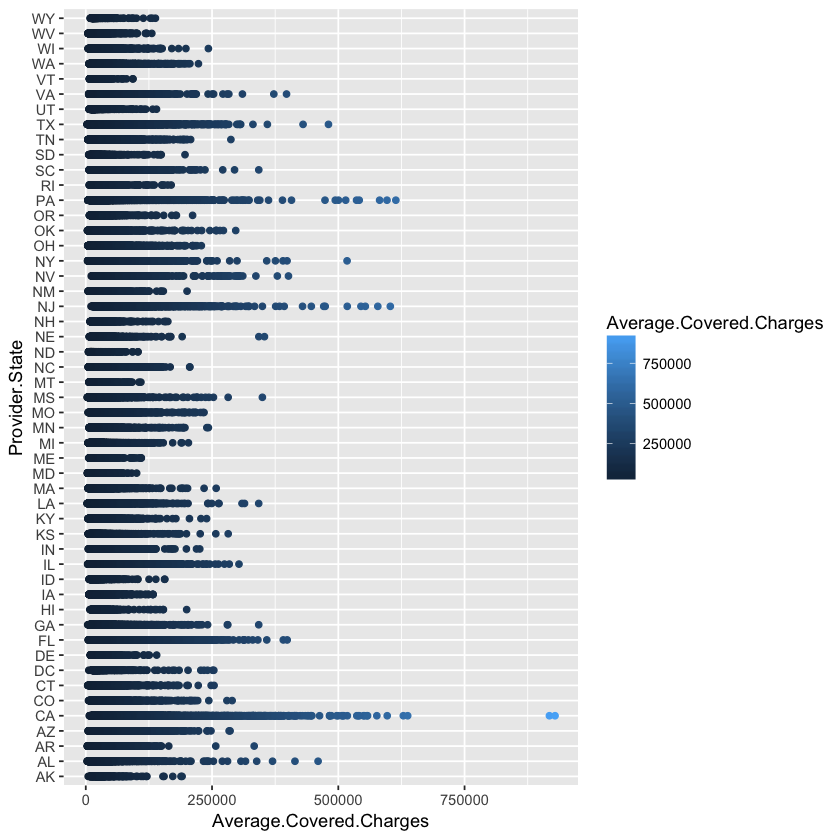

In [11]:
payment <- as.data.table(payment)
av1 <- payment[,Average.Covered.Charges,by=Provider.State]
ggplot(data = av1,mapping = aes(y = Provider.State,x = Average.Covered.Charges,colour=Average.Covered.Charges))+
  geom_point()

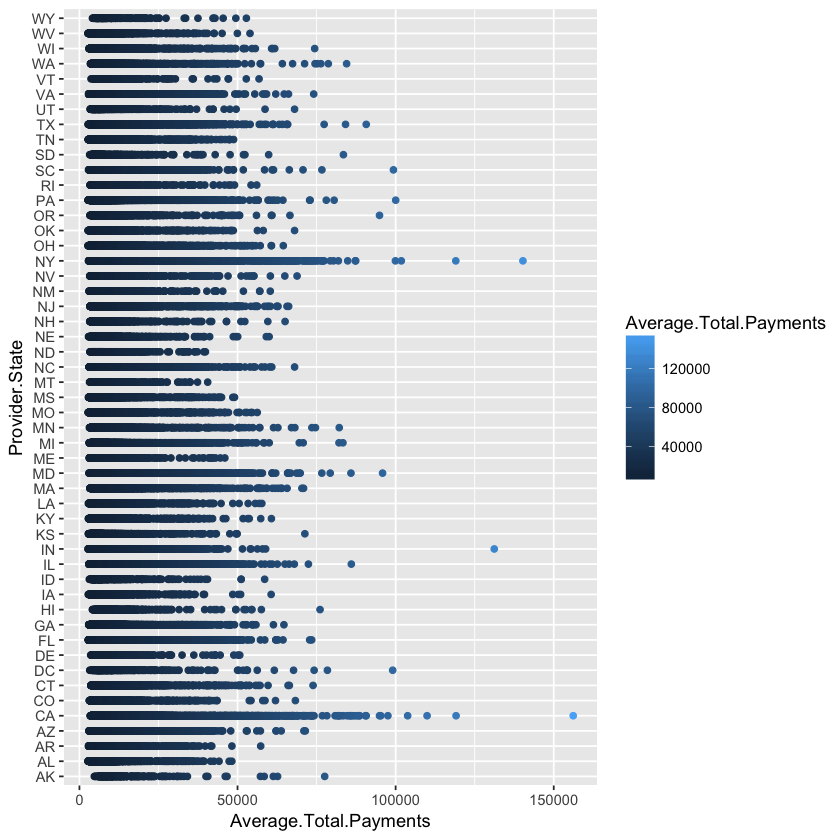

In [13]:
av1 <- payment[,Average.Total.Payments,by=Provider.State]

ggplot(data = av1,mapping = aes(y = Provider.State,x = Average.Total.Payments,colour=Average.Total.Payments))+
  geom_point()

In [59]:
V1 <- payment %>% # aggregate procedures for each hospital
  group_by(Provider.Id, Provider.Zip.Code, Provider.Name) %>% # keep zip & name
  summarise(procSum = sum(Total.Discharges) ) 

# merge aggregated hospital data with zipcode, copy lat+lon for each hospital
V2 <- merge(V1,zipcode, by.x= "Provider.Zip.Code", by.y= "zip")

g <- list( 
  scope = 'usa',
  projection = list(type = 'albers usa'),
  showland = TRUE,
  subunitwidth = 1,
  countrywidth = 1
)
V1 <- payment %>% # aggregate procedures for each hospital
  group_by(Provider.Id, Provider.Zip.Code, Provider.Name) %>% # keep zip & name
  summarise(procSum = sum(Total.Discharges) ) 

V2 <- merge(V1,zipcode, by.x= "Provider.Zip.Code", by.y= "zip")

head(V2)
g <- list( 
  scope = 'usa',
  projection = list(type = 'albers usa'),
  showland = TRUE,
  subunitwidth = 1,
  countrywidth = 1
)
k<-plot_ly(V2, lon = longitude, lat = latitude , 
        text = paste(Provider.Name, city,procSum, sep = "\n"),
        marker = list(size = sqrt(procSum/50) + 1, line = list(width = 0)),
        type = 'scattergeo', locationmode = 'USA-states') %>%
  layout(title = 'aggregated procedure counts at US hospitals', geo = g)
setwd("/Users/chriskuo/Downloads")
embed_notebook(k)

Provider.Zip.Code Provider.Id Provider.Name                  procSum city    
1 10003             330169      BETH ISRAEL MEDICAL CENTER     10395   New York
2 10016             330214      NYU HOSPITALS CENTER            6619   New York
3 10016             330204      BELLEVUE HOSPITAL CENTER        1324   New York
4 10021             330119      LENOX HILL HOSPITAL             5591   New York
5 10021             330270      HOSPITAL FOR SPECIAL SURGERY    3956   New York
6 10021             330101      NEW YORK-PRESBYTERIAN HOSPITAL 16834   New York
  state latitude longitude
1 NY    40.73251 -73.98935
2 NY    40.74618 -73.97759
3 NY    40.74618 -73.97759
4 NY    40.76842 -73.96045
5 NY    40.76842 -73.96045
6 NY    40.76842 -73.96045

ERROR: Error in plot_ly(V2, lon = longitude, lat = latitude, text = paste(Provider.Name, : object 'longitude' not found
